<a href="https://colab.research.google.com/github/Saso994/Python3-learning/blob/master/snp_density_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install biopython

     |████████████████████████████████| 2.3 MB 15.9 MB/s 


In [ ]:
from urllib.request import urlopen
from Bio import SeqIO
from io import StringIO
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
person2 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
person2.head()
#we have 5 columns, 2nd column is chromosome number with symbol chr1, chr2 and so on
#for the 5th column, we have alternative allele or the SNP 
#to solve prob1, we need first to extract the part of the table that starts and ends with chr 16
#then we will count how many rows we have that are corresponding to alt count or SNP count


,chr,pos,id,ref,alt
0,chr1,14677,rs201327123,G,A
1,chr1,15922,rs375964566,A,G
2,chr1,15956,rs112448831,G,A
3,chr1,16014,rs113442401;rs75082847,C,T
4,chr1,16298,rs62636498;rs77798508,C,T


In [ ]:
chr16 = person2.loc[person2['chr'] == 'chr16']
chr16


,chr,pos,id,ref,alt
3631593,chr16,10054,rs62028702,A,C
3631594,chr16,10095,rs62028704,G,T
3631595,chr16,10185,rs117018261,C,G
3631596,chr16,10214,rs112858078,A,G
3631597,chr16,10291,rs76368850,T,C
...,...,...,...,...,...
3763748,chr16,90215707,rs370407699;rs553057347;rs57592413,A,AT
3763749,chr16,90216009,rs375777462,G,A
3763750,chr16,90220205,rs199953405,GTC,G
3763751,chr16,90220432,rs28410953,C,G


In [ ]:
alt = list(chr16.alt)
total_snp_count = len(alt)
total_snp_count

132160

Q1: SNP count in chr16 = 132160

In [ ]:
tup = list(zip(chr16.pos, chr16.alt))
#tup[:10]
chr16_size = 90338345 #from https://media.githubusercontent.com/media/ahmedmoustafa/platinum-genomes/main/chromosomes.tsv

creating 10kb window in chr16_size

In [ ]:
kb_window = [] #0, 10000, 20000, 30000

for i in range(0, chr16_size, 10000):
  kb_window.append(i)
    
    
print(kb_window[:100])
print(len(kb_window))

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000, 720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000, 800000, 810000, 820000, 830000, 840000, 850000, 860000, 870000, 880000, 890000, 900000, 910000, 920000, 930000, 940000, 950000, 960000, 970000, 980000, 990000]
9034


In [ ]:
snp_count = []
start = 0
step = 1000 
size = 10000
for i in range(0, chr16_size, step):
  start = i+1
  end = start + size 
  count = 0
  for snp in tup[:50]:
    if snp[0] >= start and snp[0] < end:
      count += 1
  snp_count.append(count)
print(snp_count)

[0, 17, 24, 24, 24, 25, 25, 25, 26, 26, 33, 16, 10, 10, 10, 10, 10, 10, 10, 10, 5, 8, 8, 8, 8, 10, 10, 10, 11, 11, 9, 7, 6, 7, 7, 5, 5, 5, 3, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#snp in 10 kb window
snp_count1 = []
count1 = 0
for i in range(1, chr16_size, 10000):
  #count = 0
  #print(i)
  for snp in tup[:500]:
    if snp[0] >= i and snp[0] < i+10000 :
      count1 += 1
  snp_count1.append(count1)

print(snp_count1)
    


[0, 33, 38, 47, 56, 75, 92, 120, 154, 163, 190, 209, 240, 257, 273, 311, 367, 393, 428, 444, 452, 463, 481, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 50

In [ ]:
kb_pos = [] #empty list to append pos in 1kb window
x = 1 #iterator of the tuple itself (to start from the second pos numb)
y = 0
x_index = []
for l in tup:
  if tup[x][0] - tup[y][0] >= 10000: #if 2nd pos in tup >= 1st pos by 1000
    kb_pos.append(tup[x][0]) #append 2nd pos to kb_pos
    x_index.append(x) #x is the index number in tup say no.17, when x is appended we have list of indices x the difference between them is the numb of snp
    y = x #if the x>= y is True. make new value of y to be x and go through the loop. it will give false. increase x by 1 and go through loop and so on. 
  else: #if x >= y FALSE. increase x by 1 and go through if again. 
    x += 1

print('kb_pos', kb_pos,'\n','x_index', x_index)


kb_pos [21413, 31639, 42008, 52775, 63495, 73898, 83947, 94083, 105322, 115490, 125727, 136531, 147283, 157451, 167775, 178307, 188349, 198358, 209241, 221186, 231300, 242773, 253400, 263407, 274030, 284170, 294659, 305457, 317242, 327623, 337867, 348151, 361092, 371723, 381890, 393051, 403212, 414015, 425980, 436337, 447990, 458119, 468138, 480157, 490343, 504159, 520233, 534026, 548838, 559106, 569822, 580025, 591044, 601113, 611142, 621245, 631280, 645287, 655360, 665847, 676907, 687269, 697454, 707459, 720487, 731757, 742034, 752234, 762273, 773554, 784491, 794605, 804689, 818347, 832803, 846809, 857487, 867767, 877873, 888717, 898777, 910725, 920814, 931634, 941872, 951930, 962393, 973578, 984421, 995311, 1018669, 1033996, 1048079, 1058485, 1068643, 1079872, 1090481, 1100802, 1111148, 1122358, 1134219, 1145545, 1155600, 1167364, 1183354, 1193557, 1203703, 1214302, 1224826, 1237669, 1247809, 1258683, 1268749, 1279426, 1289452, 1299861, 1310656, 1320728, 1330760, 1341220, 1353597, 1

In [ ]:
x_axis = [kb_pos[0] - 10000] + kb_pos
print(len(x_axis), x_axis) 
sub_y = [0] + x_index
print(len(sub_y), sub_y)

snp_c = [0, x_index[0]]
i = 0
for n in range (len(x_index)-1):
  c = x_index[i+1] - x_index[i]  
  snp_c.append(c)
  i+= 1 
print(len(snp_c), snp_c)


6608 [11413, 21413, 31639, 42008, 52775, 63495, 73898, 83947, 94083, 105322, 115490, 125727, 136531, 147283, 157451, 167775, 178307, 188349, 198358, 209241, 221186, 231300, 242773, 253400, 263407, 274030, 284170, 294659, 305457, 317242, 327623, 337867, 348151, 361092, 371723, 381890, 393051, 403212, 414015, 425980, 436337, 447990, 458119, 468138, 480157, 490343, 504159, 520233, 534026, 548838, 559106, 569822, 580025, 591044, 601113, 611142, 621245, 631280, 645287, 655360, 665847, 676907, 687269, 697454, 707459, 720487, 731757, 742034, 752234, 762273, 773554, 784491, 794605, 804689, 818347, 832803, 846809, 857487, 867767, 877873, 888717, 898777, 910725, 920814, 931634, 941872, 951930, 962393, 973578, 984421, 995311, 1018669, 1033996, 1048079, 1058485, 1068643, 1079872, 1090481, 1100802, 1111148, 1122358, 1134219, 1145545, 1155600, 1167364, 1183354, 1193557, 1203703, 1214302, 1224826, 1237669, 1247809, 1258683, 1268749, 1279426, 1289452, 1299861, 1310656, 1320728, 1330760, 1341220, 13535

Q2: plotting of snp count against 10kb window of chr16

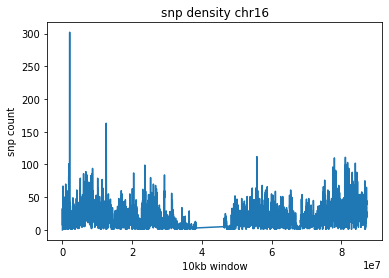

In [ ]:
plt.plot(x_axis, snp_c) #x_axis (1kb pos of chr16 where snps are located)
plt.xlabel('10kb window')
plt.ylabel('snp count')
plt.title("snp density chr16")
#fig, ax = plt.plot (figsize=(12,3))
plt.show()


As shown in the figure there is a position in chr16 with 300 or more snps
to find this position I created a code to search for the max value in the snps and locate its index so I can get the exact window for this large snp density

In [ ]:
print(max(snp_c), snp_c.index(max(snp_c)))
print(x_axis[185])

302 185
2089874


Q3: highest snp density is 302

the 10kb window associated with it is 2089874 in chr16

looking for this position in chr16 in genome.ucsc.edu 
I found that Human Gene TSC2 (ENST00000643088.1) is encoded in this window and that mutation of this gene can result in tuberous sclerosis complex

PKD1 (ENST00000262304.9) gene was also encoded in this window. it is responsible for glycoprotein encoding